<a href="https://colab.research.google.com/github/MorganChidley/Advanced-Topics-Assignment/blob/main/Advanced_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dataset and Displaying first few rows**

In [2]:
# Importing nescesary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Loading dataset into a Pandas DataFrame
file_path = "/content/drive/MyDrive/austin_weather.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows to understand the structure
dataset.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


**Filtering Data and Addinng additional columns**

In [3]:
# Using required columns only, "Date and TempAvgF"
dataset = dataset[["Date", "TempAvgF"]]

# Converting the Date column to datetime format
dataset["Date"] = pd.to_datetime(dataset["Date"])

# Extract the Year and Month Values
dataset["Year"] = dataset["Date"].dt.year
dataset["Month"] = dataset["Date"].dt.month

# Extract Day of the Year
dataset["DayOfYear"] = dataset["Date"].dt.dayofyear

# Filter data for the first year in the dataset (2014 because there were only 11 days of data for 2013)
dataset_first_year = dataset[dataset["Year"] == 2014].copy()

# Adding a Day Of Year Column
dataset_first_year["DayOfYear"] = dataset_first_year["Date"].dt.dayofyear

# Calculate 25-Day Mocing Average
dataset_first_year["TempAvgF_MA25"] = dataset_first_year["TempAvgF"].rolling(window=25, min_periods=1).mean()


# Display the first few rows of the processed data
dataset_first_year.head()


<ipython-input-3-5c4750f161c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = pd.to_datetime(dataset["Date"])
<ipython-input-3-5c4750f161c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Year"] = dataset["Date"].dt.year
<ipython-input-3-5c4750f161c6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Date,TempAvgF,Year,Month,DayOfYear,TempAvgF_MA25
11,2014-01-01,54,2014,1,1,54.0
12,2014-01-02,44,2014,1,2,49.0
13,2014-01-03,43,2014,1,3,47.0
14,2014-01-04,57,2014,1,4,49.5
15,2014-01-05,47,2014,1,5,49.0


**Checking for Missing values and rows**

In [4]:
# Checking for missing rows
missing_rows = dataset[dataset.isna().any(axis=1)]
print(missing_rows)

# Checking for missing values
dataset.isnull().sum()

Empty DataFrame
Columns: [Date, TempAvgF, Year, Month, DayOfYear]
Index: []


,0
Date,0
TempAvgF,0
Year,0
Month,0
DayOfYear,0


**Checking for Duplicates**

In [5]:
# Removing duplicates
dataset_cleaned = dataset.drop_duplicates(subset=["Date", "TempAvgF"], keep="first")

# Check the shape of the DataFrame before and after removing duplicates
print("Original shape:", dataset.shape)
print("Shape after removing duplicates:", dataset_cleaned.shape)

Original shape: (1319, 5)
Shape after removing duplicates: (1319, 5)


**Calculating Outliers**

In [6]:
# Calculate quantiles
Q1 = dataset["TempAvgF"].quantile(0.25)
Q3 = dataset["TempAvgF"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dataset[(dataset["TempAvgF"] < lower_bound) | (dataset["TempAvgF"] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
           Date  TempAvgF  Year  Month  DayOfYear
16   2014-01-06        29  2014      1          6
47   2014-02-06        29  2014      2         37
383  2015-01-08        30  2015      1          8
1112 2017-01-06        29  2017      1          6


**Plotting the Raw Data and 25-Day Moving Average**

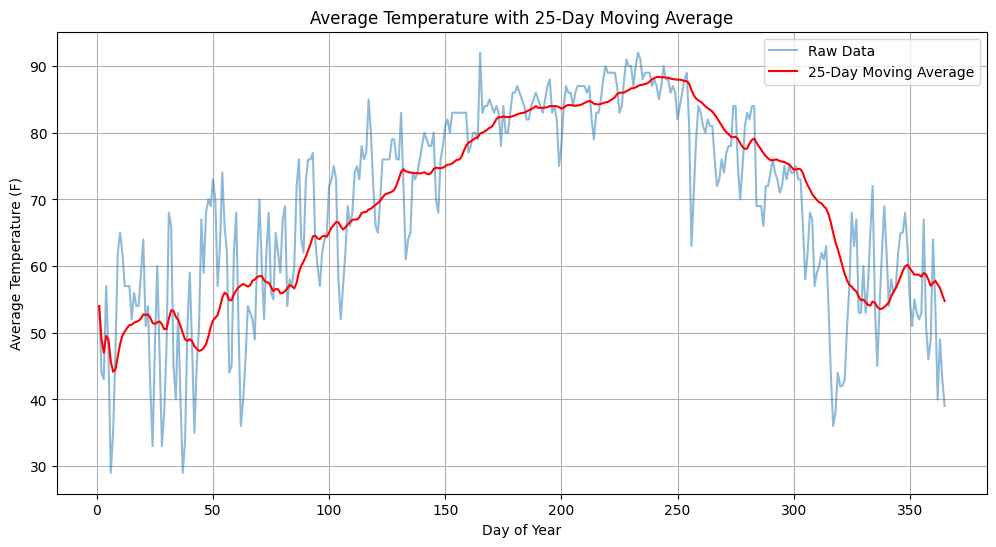

In [7]:
# Plotting the Graph with Raw Data and 25-Dat Moving average
plt.figure(figsize=(12, 6))
plt.plot(dataset_first_year["DayOfYear"], dataset_first_year["TempAvgF"], label="Raw Data", alpha=0.5)
plt.plot(dataset_first_year["DayOfYear"], dataset_first_year["TempAvgF_MA25"], label="25-Day Moving Average", color="red")
plt.xlabel("Day of Year")
plt.ylabel("Average Temperature (F)")
plt.title("Average Temperature with 25-Day Moving Average")
plt.legend()



plt.grid(True)
plt.show()

**Plotting the Trendline using LinearRegression**

Intercept: 63.89966882432636
Coefficient: 0.029592347917072815


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


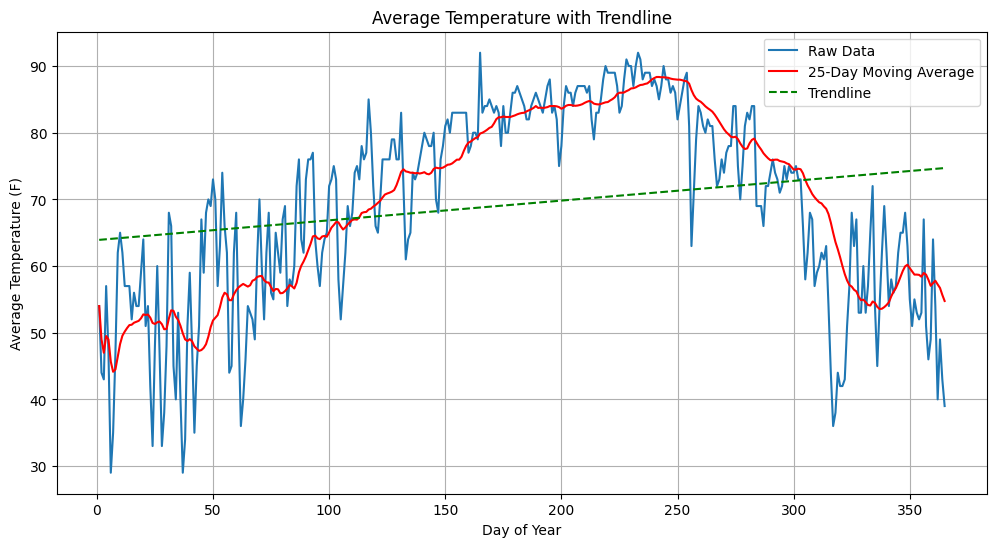

In [8]:
# Fit a Linear regression model
X = dataset_first_year[["DayOfYear"]]
y = dataset_first_year["TempAvgF"]

model = LinearRegression()
model.fit(X, y)

# Print the models parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Calculating trendline values
first_day = 1
middle_day = 183
last_day = 365

trendline_values = model.predict(np.array([[first_day], [middle_day], [last_day]]))

# Plotting the trendline on the graph
plt.figure(figsize=(12, 6))
plt.plot(dataset_first_year["DayOfYear"], dataset_first_year["TempAvgF"], label="Raw Data")
plt.plot(dataset_first_year["DayOfYear"], dataset_first_year["TempAvgF_MA25"], label="25-Day Moving Average", color="red")
plt.plot([first_day, middle_day, last_day], trendline_values, label="Trendline", color="green", linestyle="--")
plt.xlabel("Day of Year")
plt.ylabel("Average Temperature (F)")
plt.title("Average Temperature with Trendline")
plt.legend()
plt.grid(True)
plt.show()